## RSSA file

```{eval-rst}
The complete API can be found at :py:class:`f4enix.output.rssa.RSSA`
```

MCNP allows to record particles crossing a surface during a
Monte Carlo simulation in order to use them as a source in
a subsequent analyses. These particle tracks are stored in
a file called RSSA.

### Loading and analyzing a RSSA file

The binary reader of this tool is very fast as it has been vectorized via Numpy. Reading a RSSA file of 6 Gb with the PyNE reader takes around 15 minutes while this reader does the same in 10 seconds. Lets start by loading a new RSSA file.

In [28]:
from f4enix.output.rssa import RSSA  # RSSA is a class representing a RSSA file

# The class is initialized by providing the path to the file 
my_rssa = RSSA('small_cyl.w')
my_rssa # printing shows relevant information

RSSA file small_cyl was recorded using the following surfaces:
  Surface id: 1
The surface type is a cylinder with a radius of 30.00
The total amount of tracks recorded is 72083, of which 72083 were neutrons and 0 were photons.
The simulation that produced this RSSA run 100000 histories
The amount of independent histories that reached the RSSA surfaces was 70797.

In [29]:
my_rssa.tracks  # This is an array containing all the infomation of all the tracks
my_rssa.x  # With this command we acces a vector holding the X position of every track
my_rssa.y  
my_rssa.z  # Same for Y and Z coordinates and the Weight values of the tracks
my_rssa.wgt
my_rssa.energies
my_rssa.histories  # History number of the tracks

# Lets print some information of the 1234 track recorded in the RSSA file
index = 1234
position = (my_rssa.x[index], my_rssa.y[index], my_rssa.z[index])
print(f'The track with index {index} was recorded at position:\n{position}')
print(f'The track had an energy of {my_rssa.energies[index]} MeV and weight of {my_rssa.wgt[index]}')
print(f'The track was originated at the history number {my_rssa.histories[index]}')

The track with index 1234 was recorded at position:
(-0.13126632308094988, 29.99971281783252, 12.254586722666627)
The track had an energy of 14.0 MeV and weight of 1.0
The track was originated at the history number 1739.0


The RSSA file may contain both neutrons and photons. The tool has a way to easily dicriminate between particle types with the use of filters, also called masks.

In [30]:
# not extremely useful in this case since only neutrons were recorded here
mask = my_rssa.mask_neutron_tracks  # to show only neutrons
mask = my_rssa.mask_photon_tracks  # to show only photons
my_rssa.x[mask]  # Show the x values for all the tracks included in the mask

total_amount_tracks = len(my_rssa.tracks)
print(f'This RSSA file recorded {total_amount_tracks} tracks...')
mask = my_rssa.mask_neutron_tracks
neutron_amount_tracks = len(my_rssa.tracks[mask])
print(f' of which {neutron_amount_tracks} were neutrons.')

This RSSA file recorded 72083 tracks...
 of which 72083 were neutrons.


### Plot cylindrical surfaces

The level of customization possible with these type of plots is quite high.

The area of a cell is 0.01cm2
The resolution is 0.10cm x 0.10cm


(<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>)

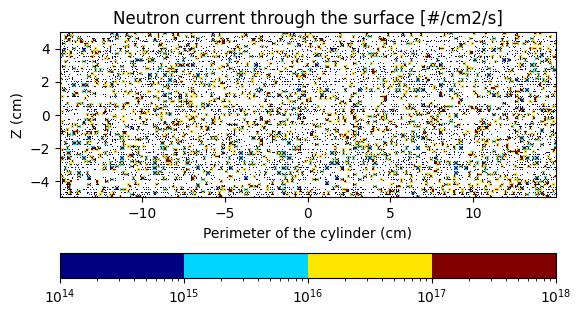

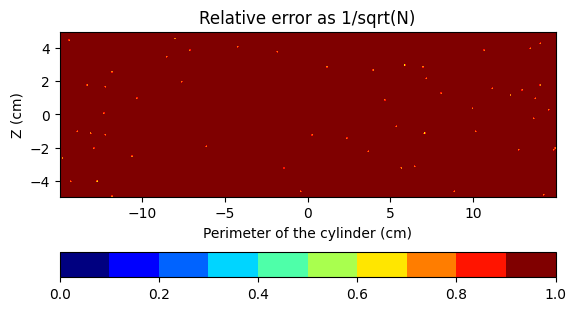

In [31]:
my_rssa.plot_cyl(particle='n',  # plot the neutron tracks
                 z_int=100,  # vertical divisions
                 theta_int=300,  # horizontal divisions
                 norm=2e20,  # used in the normalization of results
                 value_range=(1e14, 1e18),  # range of colors in the legend
                 x_range=(-15, 15),  # x limits of the plot
                 z_range=(-5, 5),  # y limits of the plot
                 # outfolder = 'ouput/folder',  # this will save the figure
                 # filename='custom file name',  # name for the saved image
                 )

But if it was not sufficient it is possible to act on the matplotlib figures
directly:

The area of a cell is 113.08cm2
The resolution is 18.85cm x 6.00cm


Text(0.5, 1.0, 'New title')

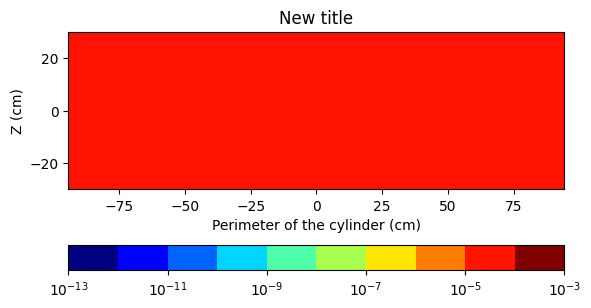

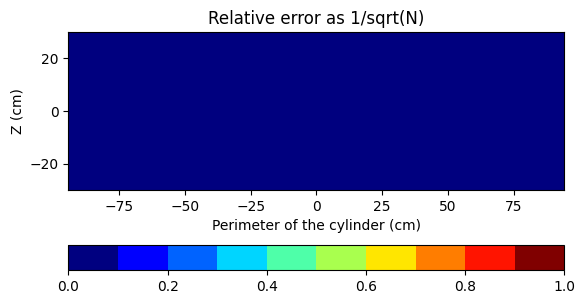

In [32]:
fig_val, fig_err = my_rssa.plot_cyl()  # these are matplotlib.pyplot.Figure objects
fig_val.axes[0].set_title('New title')  # set a different title for instance